# Challenge 2: Kernel Ridge Regression and Kernel PCA


                                   Erion Islamay, Nicola Zucchia, Vittorio Amoruso, Nicola Cortinovis



<a target="_blank" href="https://colab.research.google.com/github/GaiaSaveri/intro-to-ml/blob/main/notebooks/challenge-two.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

The challenge is to show why it is better (or not) to use kernelised methods in two toy data sets, and find out which kernel is the most suitable for each.    
There are two main tasks:
1. Ridge Regression vs Kernel Ridge Regression
2. PCA vs Kernel PCA

Tip: *for the whole challenge, you can use ```sklearn```.*

## 1. Ridge Regression
Using the training and test data sets created in the following cell, what you have to do is:
* Fit a linear Ridge Regression model;
* Fit a Kernel Ridge Regression model with a Gaussian kernel and one with a Polynomial kernel. Through a grid search, see how different values for gamma for the Gaussian, and different degrees and values for the regularisation term for the Polynomial, change the line that gets fitted by the model.   
Lastly, fit one last KRR with the best kernel and best parameters that you found (the ones that minimise the test error).

For each subtask, calculate the RMSE on the test data set and plot a visual representation of each fitted line, also when trying different values for the parameters.

In [1]:
import numpy as np
import matplotlib as plt

# create training dataset
train_points = 20
eps = np.random.normal(0, 1, train_points)

X_train = np.linspace(-5, 5, train_points)
y_train = (X_train+4) * (X_train+1) * (np.cos(X_train)-1) * (X_train-3) + eps

X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

# create testing data set
test_points = 1000

X_test = np.linspace(-5, 5, test_points)
y_test = (X_test+4) * (X_test+1) * (np.cos(X_test)-1) * (X_test-3)

X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

Visualizziamo il Training Set e il Test Set:

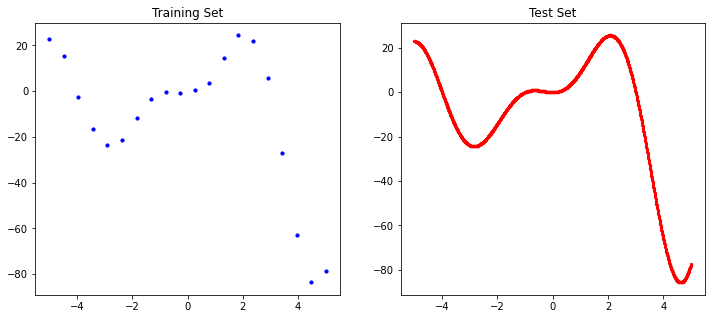

In [2]:
import matplotlib.pyplot as plt

# Plot training set
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax1.scatter(X_train, y_train, s=10, color='blue')
ax1.set_title('Training Set')

# Plot test set
ax2.scatter(X_test, y_test, s=5, color='red')
ax2.set_title('Test Set')

plt.show()


### Fit a linear Ridge Regression model

In [3]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# define the parameter grid
param_grid_Ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

ridge = Ridge()

grid_search_Ridge = GridSearchCV(ridge, param_grid_Ridge, cv=5, scoring='neg_root_mean_squared_error')

# fit the GridSearchCV object to the training data
grid_search_Ridge.fit(X_train, y_train)

print("Best parameters: ", grid_search_Ridge.best_params_)

best_ridge = grid_search_Ridge.best_estimator_
y_pred = best_ridge.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE on testing data: ", rmse)


Best parameters:  {'alpha': 10}
RMSE on testing data:  26.81217223390121


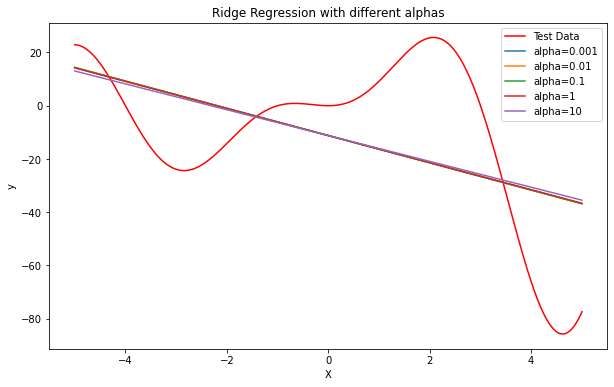

In [4]:
import matplotlib.pyplot as plt

# plot the test data
plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test, color='red', label='Test Data')

# plot the predictions from each model with different colors
for i, alpha in enumerate(param_grid_Ridge['alpha']):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    plt.plot(X_test, y_pred, label='alpha={}'.format(alpha))

plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Ridge Regression with different alphas')
plt.show()


Dall'analisi risulta che il miglior valore di alpha per la regolarizzazione è 10. La ridge regression non sembra essere un buon modello predittivo per questo dataset in quanto la RMSE è alta. Questo è dovuto al fatto che la funzione generatrice dei dati non è lineare. Si prevede di ottenere risultati migliori con la KRR.

### Kernel Ridge Regression

Task:  Fit a Kernel Ridge Regression model with a Gaussian kernel and one with a Polynomial kernel. Through a grid search, see how different values for gamma for the Gaussian, and different degrees and values for the regularisation term for the Polynomial, change the line that gets fitted by the model.   
Lastly, fit one last KRR with the best kernel and best parameters that you found (the ones that minimise the test error).

KRR con Kernel Gaussiano

Best parameters: {'alpha': 0.1, 'gamma': 1.0}


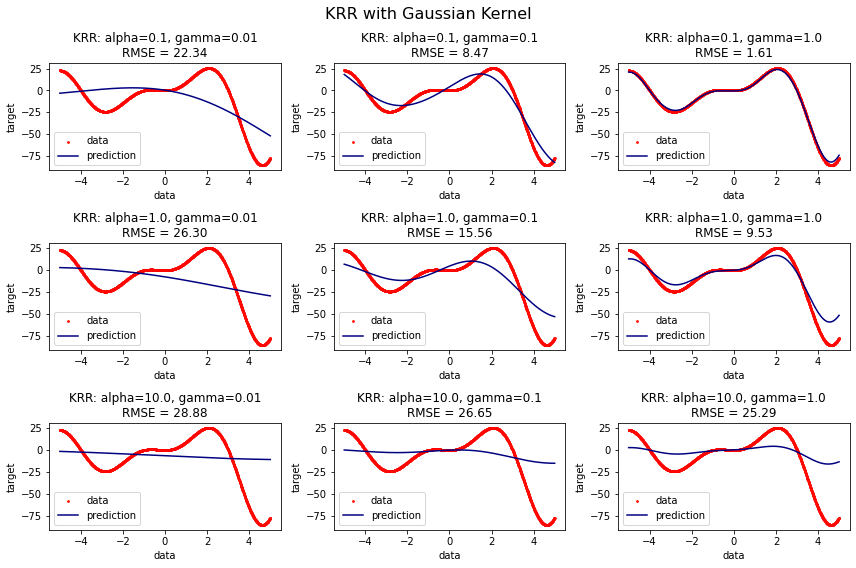

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

param_grid_Gauss = {'alpha': [0.1, 1.0, 10.0], 'gamma': [0.01, 0.1, 1.0]}

krr = KernelRidge(kernel='rbf')

grid_search_Gauss = GridSearchCV(krr, param_grid_Gauss, cv=5, scoring='neg_root_mean_squared_error')

grid_search_Gauss.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search_Gauss.best_params_))

fig, axs = plt.subplots(len(param_grid_Gauss['alpha']), len(param_grid_Gauss['gamma']), figsize=(12, 8))

# train the model with different parameters and plot the results
for i, alpha in enumerate(param_grid_Gauss['alpha']):
    for j, gamma in enumerate(param_grid_Gauss['gamma']):
        krr = KernelRidge(kernel='rbf', alpha=alpha, gamma=gamma)
        krr.fit(X_train, y_train)
        y_pred_Gauss = krr.predict(X_test)

        # get the RMSE 
        rmse = np.sqrt(mean_squared_error(y_test, y_pred_Gauss))

        # plot the test data
        axs[i, j].scatter(X_test, y_test, s=3, edgecolor="red", c="darkorange", label="data")
        axs[i, j].plot(X_test, y_pred_Gauss, color="navy", label="prediction")
        axs[i, j].set_xlabel("data")
        axs[i, j].set_ylabel("target")
        axs[i, j].set_title("KRR: alpha={}, gamma={}\nRMSE = {:.2f}".format(alpha, gamma, rmse))
        axs[i, j].legend()

fig.suptitle("KRR with Gaussian Kernel", fontsize=16)
plt.tight_layout()
plt.show()


Il kernel Gaussiano per la KRR sembra dare risultati soddisfacenti anche considerando la bassa sample size del training set. I migliori risultati si ottengono con iperparametri alpha e gamma di 0.1 e 1.0 rispettivamente, ottenuti con la cross validation nel training set.

Kernel polimonimale

Best parameters: {'alpha': 10.0, 'degree': 3}


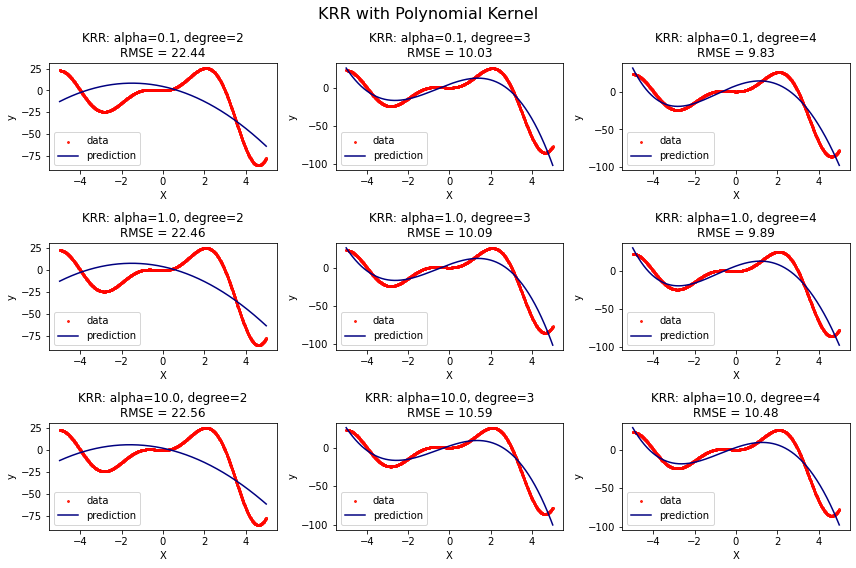

In [6]:

param_grid_Poly = {'alpha': [0.1, 1.0, 10.0], 'degree': [2,3,4]}

krr = KernelRidge(kernel='poly')

grid_search_Poly = GridSearchCV(krr, param_grid_Poly, cv=5, scoring='neg_root_mean_squared_error')

grid_search_Poly.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search_Poly.best_params_))

fig, axs = plt.subplots(len(param_grid_Poly['alpha']), len(param_grid_Poly['degree']), figsize=(12, 8))

# train a model for each combination of parameters in the grid
for i, alpha in enumerate(param_grid_Poly['alpha']):
    for j, degree in enumerate(param_grid_Poly['degree']):
        krr = KernelRidge(kernel='poly', alpha=alpha, degree=degree)
        krr.fit(X_train, y_train)
        y_pred_Poly = krr.predict(X_test)

        # get the RMSE on the test set
        rmse = np.sqrt(mean_squared_error(y_test, y_pred_Poly))

        axs[i, j].scatter(X_test, y_test, s=3, edgecolor="red", c="darkorange", label="data")
        axs[i, j].plot(X_test, y_pred_Poly, color="navy", label="prediction")
        axs[i, j].set_xlabel("X")
        axs[i, j].set_ylabel("y")
        axs[i, j].set_title("KRR: alpha={}, degree={}\nRMSE = {:.2f}".format(alpha, degree, rmse))
        axs[i, j].legend()

fig.suptitle("KRR with Polynomial Kernel", fontsize=16)
plt.tight_layout()
plt.show()

Il kernel polinomiale fornisce rislutati peggiori rispetto al kernel gaussiano. 

Task:  fit one last KRR with the best kernel and best parameters that you found (the ones that minimise the test error).

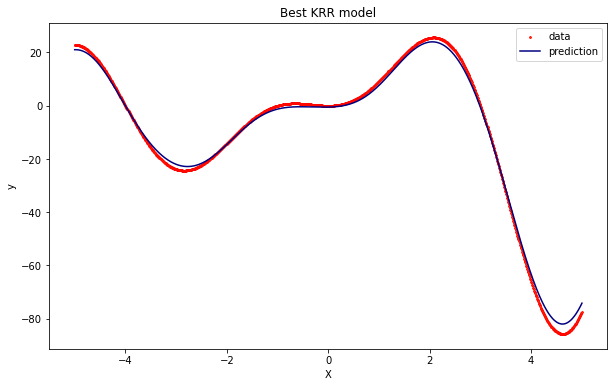

In [7]:
best_alpha = 0.1
best_gamma = 1

plt.figure(figsize=(10, 6))

krr = KernelRidge(kernel='rbf', alpha=best_alpha, gamma=best_gamma)
krr.fit(X_train, y_train)
y_pred_Gauss = krr.predict(X_test)

# get the RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred_Gauss))

plt.scatter(X_test, y_test, s=3, edgecolor="red", c="darkorange", label="data")
plt.plot(X_test, y_pred_Gauss, color="navy", label="prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Best KRR model")
plt.legend()

Con i dati di training a disposizione un modello di KRR con kernel gaussiano e iperparamentri alpha=0.1 e gamma=1.0 danno i risultati migliori sia nel training set che nel test set. 

## 2. PCA
Using the training and test data sets created in the following cell, what you have to do is:
* Fit a PCA model;
* Fit a Kernel PCA model with a kernel of your choice.

For each subtask, plot a visual representation of the projections and verify the accuracy of that kernel on the test data set using SVM.

Visualizzazione del dataset:

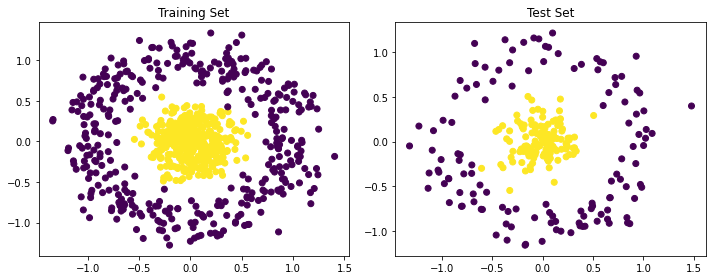

In [8]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_circles(n_samples=1000, noise=0.15, factor=0.2, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# plot training set
axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
axs[0].set_title('Training Set')

# plot test set
axs[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')
axs[1].set_title('Test Set')

plt.tight_layout()
plt.show()

### Fit a PCA model

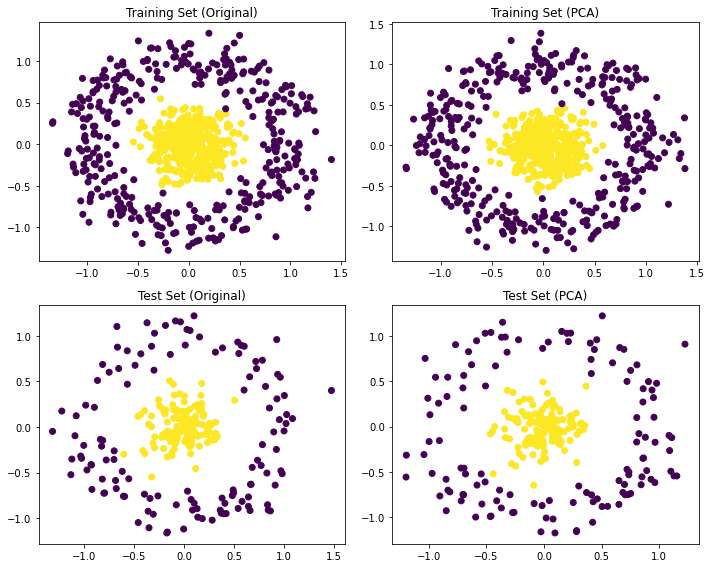

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit PCA model
pca = PCA(n_components=2)
pca.fit(X_train)

# Transform training and test data using the PCA model
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# plot training and test data before and after PCA
axs[0, 0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
axs[0, 0].set_title('Training Set (Original)')

axs[0, 1].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
axs[0, 1].set_title('Training Set (PCA)')

axs[1, 0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')
axs[1, 0].set_title('Test Set (Original)')

axs[1, 1].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis')
axs[1, 1].set_title('Test Set (PCA)')

plt.tight_layout()
plt.show()


In un dataset con solo 2 feature, la rotazione delle features non è in grado di ridurre la dimensionalità del dataset e non fornisce molte informazioni utili.

SVM semplice sulle proiezioni:

Accuracy: 0.632


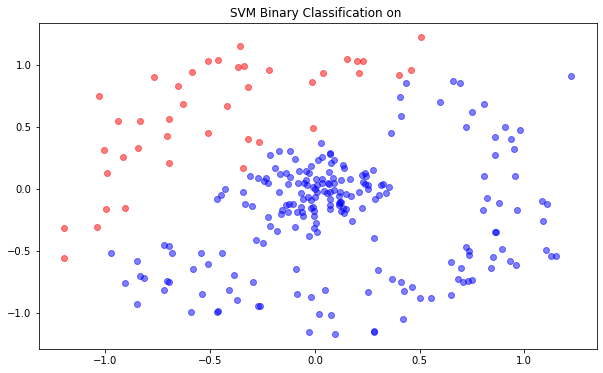

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# evaluate the model on the test set
svm = SVC(kernel="linear")
svm.fit(X_train_pca, y_train)
# evaluate the model on the test set
y_pred_svm_pca = svm.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred_svm_pca)
print('Accuracy:', accuracy)

plt.figure(figsize=(10,6))

plt.scatter(X_test_pca[y_pred_svm_pca==0, 0], X_test_pca[y_pred_svm_pca==0, 1], color='red', alpha=0.5)
plt.scatter(X_test_pca[y_pred_svm_pca==1, 0], X_test_pca[y_pred_svm_pca==1, 1], color='blue', alpha=0.5)

plt.title('SVM Binary Classification on ')

plt.show()

Un modello di classificazione semplice SVM ha un'accuratezza molto bassa sui dati di test. Questo è dovuto alla natura stessa dei dati che in questo caso non sono separabili linearmente.

SVM con kernel gaussiano sulle proiezioni:

Accuracy: 0.996


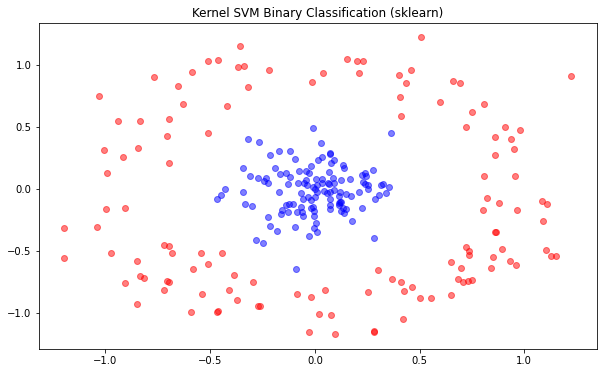

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# evaluate the accuracy of the SVM with Gaussian kernel on the test data
svm = SVC(kernel="rbf")
svm.fit(X_train_pca, y_train)
# evaluate the accuracy of the SVM on the test data
y_pred_svm_pca = svm.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred_svm_pca)
print('Accuracy:', accuracy)

plt.figure(figsize=(10,6))

plt.scatter(X_test_pca[y_pred_svm_pca==0, 0], X_test_pca[y_pred_svm_pca==0, 1], color='red', alpha=0.5)
plt.scatter(X_test_pca[y_pred_svm_pca==1, 0], X_test_pca[y_pred_svm_pca==1, 1], color='blue', alpha=0.5)

plt.title('Kernel SVM Binary Classification (sklearn)')

plt.show()

Mentre utilizzando un kernel gaussiano per il KSVM si riescono ad ottenere ottimi risultati.

### Kernel PCA

Task:  Fit a Kernel PCA model with a kernel of your choice.

Miglior gamma: 10.0
Miglior accuracy: 0.988


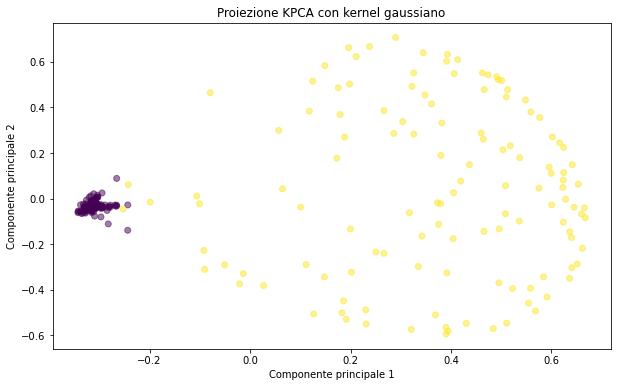

In [12]:
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# find best gamma for KPCA
gammas = np.logspace(-2, 2, 5) # possible values for gamma
kpca_scores = []

for gamma in gammas:
    # KPCA with rbf kernel    
    kpca = KernelPCA(n_components=2, kernel='rbf', gamma=gamma)
    kpca.fit(X_train)
    X_train_kpca = kpca.transform(X_train)
    # SVM with linear kernel
    svm = SVC(kernel='linear')
    svm.fit(X_train_kpca, y_train)
    X_test_kpca = kpca.transform(X_test)
    kpca_scores.append(svm.score(X_test_kpca, y_test))
# get best gamma   
best_gamma = gammas[np.argmax(kpca_scores)]
print("Miglior gamma:", best_gamma)
print("Miglior accuracy:", np.max(kpca_scores))

# projection with best gamma
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=best_gamma)
kpca.fit(X_train)
X_train_kpca = kpca.transform(X_train)
X_test_kpca = kpca.transform(X_test)


plt.figure(figsize=(10, 6))

plt.scatter(X_test_kpca[:, 0], X_test_kpca[:, 1], c=y_test, alpha=0.5)
plt.xlabel("Componente principale 1")
plt.ylabel("Componente principale 2")
plt.title("Proiezione KPCA con kernel gaussiano")
plt.show()


Accuracy: 0.988


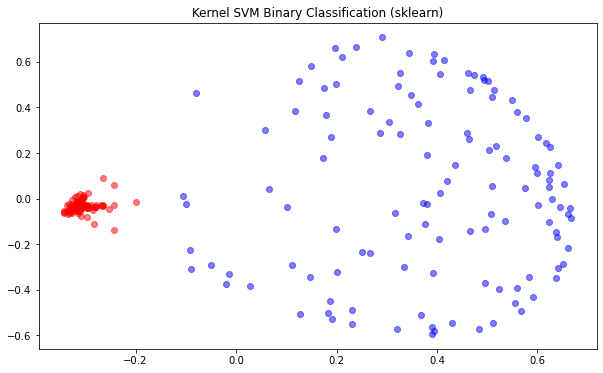

In [13]:
# Evaluating the accuracy of the SVM on the test data
svm = SVC(kernel="linear")
svm.fit(X_train_kpca, y_train)
y_pred_svm = svm.predict(X_test_kpca)
accuracy = accuracy_score(y_test, y_pred_svm)
print('Accuracy:', accuracy)

plt.figure(figsize=(10,6))

plt.scatter(X_test_kpca[y_pred_svm==0, 0], X_test_kpca[y_pred_svm==0, 1], color='red', alpha=0.5)
plt.scatter(X_test_kpca[y_pred_svm==1, 0], X_test_kpca[y_pred_svm==1, 1], color='blue', alpha=0.5)

plt.title('Kernel SVM Binary Classification (sklearn)')

plt.show()

Usando KPCA anzichè PCA i dati risultano facilmente separabili anche da un separatore lineare semplice come SVC con un'accuratezza soddisfacente.

## 3. PCA pt.2

Task:  Repeat the last point of the previous task with a dataset made with ```sklearn.datasets.make_classification()```. Find the best kernel, and comment on your discoveries in the report. What differences do you see with the previous data set?

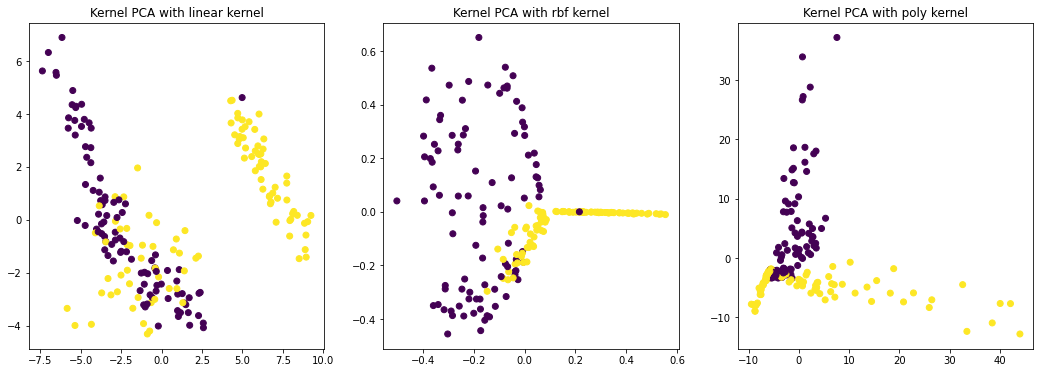

In [14]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Create classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=2, n_repeated=0, n_classes=2,
                           class_sep=2.0, shuffle=True, random_state=0)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit Kernel PCA on 2 principal components with linear, rbf and poly kernels
kpca_linear = KernelPCA(n_components=2, kernel='linear')
kpca_rbf = KernelPCA(n_components=2, kernel='rbf')
kpca_poly = KernelPCA(n_components=2, kernel='poly')

X_train_kpca_linear = kpca_linear.fit_transform(X_train)
X_train_kpca_rbf = kpca_rbf.fit_transform(X_train)
X_train_kpca_poly = kpca_poly.fit_transform(X_train)

X_test_kpca_linear = kpca_linear.transform(X_test)
X_test_kpca_rbf = kpca_rbf.transform(X_test)
X_test_kpca_poly = kpca_poly.transform(X_test)

# Plot the projections for each case
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X_test_kpca_linear[:, 0], X_test_kpca_linear[:, 1], c=y_test)
plt.title('Kernel PCA with linear kernel')

plt.subplot(1, 3, 2)
plt.scatter(X_test_kpca_rbf[:, 0], X_test_kpca_rbf[:, 1], c=y_test)
plt.title('Kernel PCA with rbf kernel')

plt.subplot(1, 3, 3)
plt.scatter(X_test_kpca_poly[:, 0], X_test_kpca_poly[:, 1], c=y_test)
plt.title('Kernel PCA with poly kernel')

plt.show()


Questo dataset è più complesso del precedente in quanto presenta più features, alcune delle quali ridontanti o inutili. Anche con una proiezione dei dati in 2D sembra che non sia possibile separarli linearmente. 

SVM accuracy on KPCA (linear): 0.765
SVM accuracy on KPCA (rbf): 0.89
SVM accuracy on KPCA (poly): 0.795


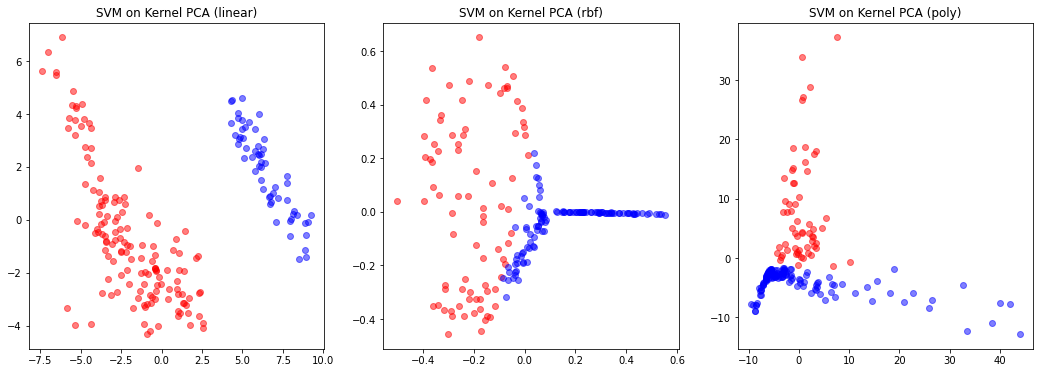

In [16]:
import numpy as np

# Train SVM with linear kernel on the projected data and calculate accuracy on test set
svm_kpca_linear = SVC(kernel='linear')
svm_kpca_linear.fit(X_train_kpca_linear, y_train)
y_pred_kpca_linear = svm_kpca_linear.predict(kpca_linear.transform(X_test))
accuracy_kpca_linear = accuracy_score(y_test, y_pred_kpca_linear)
print('SVM accuracy on KPCA (linear):', accuracy_kpca_linear)

# Train SVM with linear kernel on the projected data and calculate accuracy on test set
svm_kpca_rbf = SVC(kernel='linear')
svm_kpca_rbf.fit(X_train_kpca_rbf, y_train)
y_pred_kpca_rbf = svm_kpca_rbf.predict(X_test_kpca_rbf)
accuracy_kpca_rbf = accuracy_score(y_test, y_pred_kpca_rbf)
print('SVM accuracy on KPCA (rbf):', accuracy_kpca_rbf)

# Train SVM with linear kernel on the projected data and calculate accuracy on test set
svm_kpca_poly = SVC(kernel='linear')
svm_kpca_poly.fit(X_train_kpca_poly, y_train)
y_pred_kpca_poly = svm_kpca_poly.predict(kpca_poly.transform(X_test))
accuracy_kpca_poly = accuracy_score(y_test, y_pred_kpca_poly)
print('SVM accuracy on KPCA (poly):', accuracy_kpca_poly)


# Plot the projections for each case
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X_test_kpca_linear[y_pred_kpca_linear==0, 0], X_test_kpca_linear[y_pred_kpca_linear==0, 1], color='red', alpha=0.5)
plt.scatter(X_test_kpca_linear[y_pred_kpca_linear==1, 0], X_test_kpca_linear[y_pred_kpca_linear==1, 1], color='blue', alpha=0.5)
plt.title('SVM on Kernel PCA (linear)')

plt.subplot(1, 3, 2)
plt.scatter(X_test_kpca_rbf[y_pred_kpca_rbf==0, 0], X_test_kpca_rbf[y_pred_kpca_rbf==0, 1], color='red', alpha=0.5)
plt.scatter(X_test_kpca_rbf[y_pred_kpca_rbf==1, 0], X_test_kpca_rbf[y_pred_kpca_rbf==1, 1], color='blue', alpha=0.5)
plt.title('SVM on Kernel PCA (rbf)')

plt.subplot(1, 3, 3)
plt.scatter(X_test_kpca_poly[y_pred_kpca_poly==0, 0], X_test_kpca_poly[y_pred_kpca_poly==0, 1], color='red', alpha=0.5)
plt.scatter(X_test_kpca_poly[y_pred_kpca_poly==1, 0], X_test_kpca_poly[y_pred_kpca_poly==1, 1], color='blue', alpha=0.5)
plt.title('SVM on Kernel PCA (poly)')

plt.show()


Infatti SVC semplice non fornisce grandi risultati nemmeno sulle proiezioni. Possiamo provare a migliorare i risultati utilizzando KSVC con kernel gaussiano sulle proiezioni.

KSVM accuracy on KPCA (linear): 0.84
KSVM accuracy on KPCA (rbf): 0.935
KSVM accuracy on KPCA (poly): 0.895


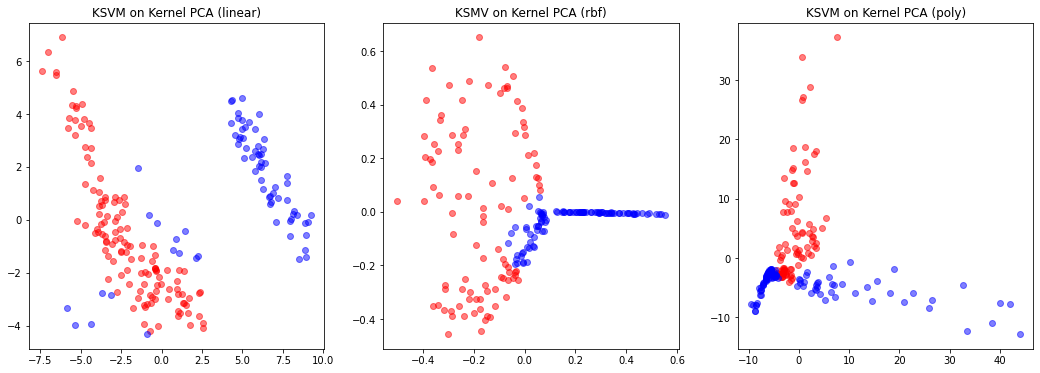

In [17]:
import numpy as np

# Train SVM with gaussian kernel on the projected data and calculate accuracy on test set
svm_kpca_linear = SVC(kernel='rbf')
svm_kpca_linear.fit(X_train_kpca_linear, y_train)
y_pred_kpca_linear = svm_kpca_linear.predict(kpca_linear.transform(X_test))
accuracy_kpca_linear = accuracy_score(y_test, y_pred_kpca_linear)
print('KSVM accuracy on KPCA (linear):', accuracy_kpca_linear)

# Train SVM with gaussian kernel on the projected data and calculate accuracy on test set
svm_kpca_rbf = SVC(kernel='rbf')
svm_kpca_rbf.fit(X_train_kpca_rbf, y_train)
y_pred_kpca_rbf = svm_kpca_rbf.predict(X_test_kpca_rbf)
accuracy_kpca_rbf = accuracy_score(y_test, y_pred_kpca_rbf)
print('KSVM accuracy on KPCA (rbf):', accuracy_kpca_rbf)

# Train SVM with gaussian kernel on the projected data and calculate accuracy on test set
svm_kpca_poly = SVC(kernel='rbf')
svm_kpca_poly.fit(X_train_kpca_poly, y_train)
y_pred_kpca_poly = svm_kpca_poly.predict(kpca_poly.transform(X_test))
accuracy_kpca_poly = accuracy_score(y_test, y_pred_kpca_poly)
print('KSVM accuracy on KPCA (poly):', accuracy_kpca_poly)


# Plot the projections for each case
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(X_test_kpca_linear[y_pred_kpca_linear==0, 0], X_test_kpca_linear[y_pred_kpca_linear==0, 1], color='red', alpha=0.5)
plt.scatter(X_test_kpca_linear[y_pred_kpca_linear==1, 0], X_test_kpca_linear[y_pred_kpca_linear==1, 1], color='blue', alpha=0.5)
plt.title('KSVM on Kernel PCA (linear)')

plt.subplot(1, 3, 2)
plt.scatter(X_test_kpca_rbf[y_pred_kpca_rbf==0, 0], X_test_kpca_rbf[y_pred_kpca_rbf==0, 1], color='red', alpha=0.5)
plt.scatter(X_test_kpca_rbf[y_pred_kpca_rbf==1, 0], X_test_kpca_rbf[y_pred_kpca_rbf==1, 1], color='blue', alpha=0.5)
plt.title('KSMV on Kernel PCA (rbf)')

plt.subplot(1, 3, 3)
plt.scatter(X_test_kpca_poly[y_pred_kpca_poly==0, 0], X_test_kpca_poly[y_pred_kpca_poly==0, 1], color='red', alpha=0.5)
plt.scatter(X_test_kpca_poly[y_pred_kpca_poly==1, 0], X_test_kpca_poly[y_pred_kpca_poly==1, 1], color='blue', alpha=0.5)
plt.title('KSVM on Kernel PCA (poly)')

plt.show()


Le accuratezze migliorano sensibilmente rispetto a prima e l'accuratezza migliore si riscontra nella proiezione effettuata con KPCA con kernel gaussiano.